In [1]:
import json
import matplotlib.pyplot as plt
from adjustText import adjust_text


plt.rcParams.update({
    "figure.figsize": (4, 2),
    "figure.dpi": 300,
    "figure.autolayout": False,
    "text.usetex": True,
    'mathtext.fontset': 'stix',
    'font.family': 'STIXGeneral',
})


def load_json(filepath):
    with open(filepath) as file:
        return json.load(file)


dataset = "eurlex"
model = "lightxml"
e = f"{dataset}_{model}"
methods = {
    "ps-k": {"optimal-instance-ps-prec": "$\\mathrm{PS-K}$"},
    "pow": {"power-law-with-beta=0.5": "$\\mathrm{Pow-K}_{\\beta=1/2}$"},
    "log": {"log": "$\\mathrm{Log-K}$"},
    "mixed": {
        "block-coord-mixed-prec-alpha=0": "$\\mathrm{Macro-P}_{\\text{bca}}$",
        "block-coord-mixed-prec-alpha=0.5": "$\\alpha=0.5$",
        "block-coord-mixed-prec-alpha=0.75": "$\\alpha=0.75$",
        "block-coord-mixed-prec-alpha=0.9": "$\\alpha=0.9$",
        "block-coord-mixed-prec-alpha=0.99": "$\\alpha=0.99$",
        "block-coord-mixed-prec-alpha=0.999": "$\\alpha=0.999$",
        "block-coord-mixed-prec-alpha=0.9999": "$\\alpha=0.9999$",
        "block-coord-mixed-prec-alpha=1.0": "$\\mathrm{Top-K}$",
    },
}

seed = 13
k = 3
x_axis = f"mP@{k}"
y_axis = f"iP@{k}"
x_axis_label = f"Macro-Precision@{k}"
y_axis_label = f"Instance-Precision@{k}"


In [62]:
def plot_results(dataset, model, methods, x_axis, y_axis, k, seed, x_axis_label, y_axis_label, title):
    texts = []
    x_rep = []
    y_rep = []
    e = f"{dataset}_{model}"

    for n, v in methods.items():
        # if len(v) == 1:
        #     path = f"results/{e}/{v.keys()[0]}_k={k}_s={seed}_results.json"
        #     method = load_json(path)
        #     plt.scatter(method[x_axis], method[y_axis], label=v.values()[0])
        #     plt.annotate(l, (method[x_axis], method[y_axis]))
        # else:
        x_val = []
        y_val = []
        for m, l in v.items():
            path = f"results/{e}/{m}_k={k}_s={seed}_results.json"
            method = load_json(path)
            x_val.append(method[x_axis])
            y_val.append(method[y_axis])
            # plt.annotate(l, (x_val[-1] + 0.002, y_val[-1] + 0.004), 
            #              horizontalalignment='left',
            #              verticalalignment='bottom',
            #              clip_on=False)
            texts.append(plt.text(x_val[-1], y_val[-1], l, size=7))
            #texts.append(plt.text(x_val[-1] + 0.002, y_val[-1] + 0.004, l, size=7))
            x_rep.append(x_val[-1])
            y_rep.append(y_val[-1])
        plt.plot(x_val, y_val, '.', linestyle="-")


    adjust_text(texts, x_rep, y_rep, min_arrow_len=10, expand=(1.1, 1.2), arrowprops=dict(arrowstyle="-", lw=0.5))
    #plt.legend()
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    # plt.ylim([0, 1])
    # plt.xlim([0, 1])
    #plt.title(f"{dataset.capitalize()}")
    plt.title(title)
    plt.margins(0.1, 0.1)
    plt.plot()
    plt.savefig(f"plots/{e}_{x_axis}_{y_axis}_k={k}.png", dpi=300, bbox_inches='tight')

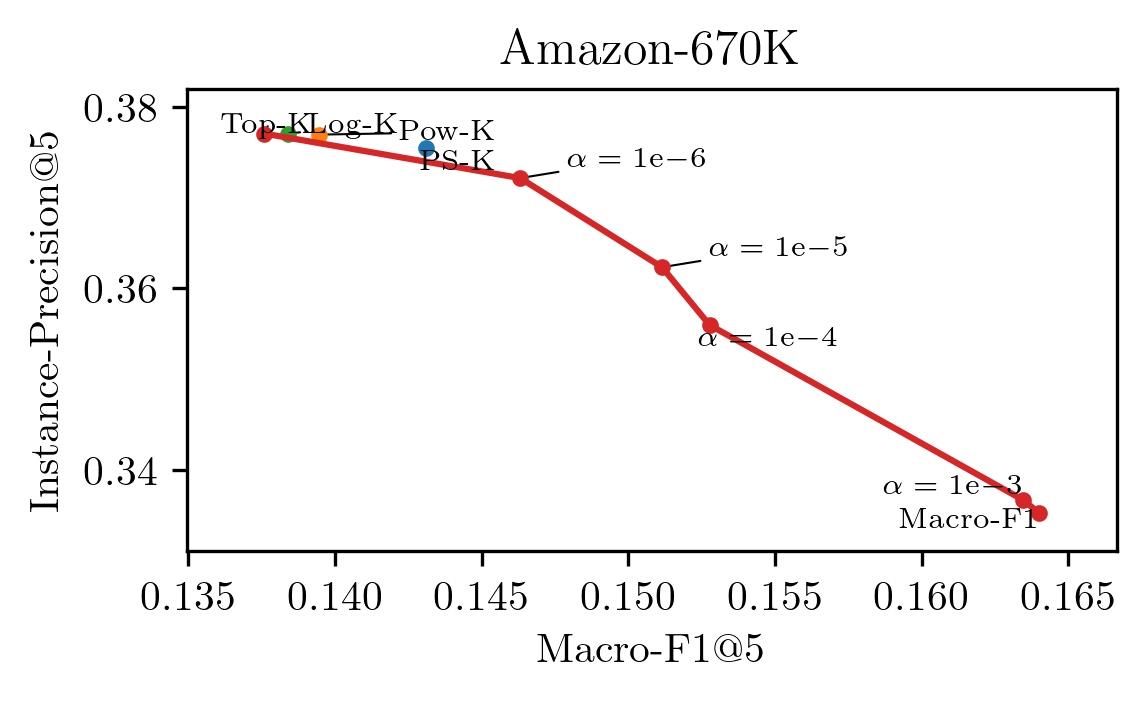

In [72]:
methods = {
    "ps-k": {"optimal-instance-ps-prec": "PS-K"},
    "pow": {"power-law-with-beta=0.5": "Pow-K"},
    "log": {"log": "Log-K"},
    "mixed": {
        "block-coord-mixed-prec-alpha=0": "Macro-P",
        #"block-coord-mixed-prec-alpha=0.5": "$\\alpha=0.5$",
        #"block-coord-mixed-prec-alpha=0.75": "$\\alpha=0.75$",
        #"block-coord-mixed-prec-alpha=0.9": "$\\alpha=1\mathrm{e}{-1}$",
        #"block-coord-mixed-prec-alpha=0.99": "$\\alpha=1\mathrm{e}{-2}$",
        "block-coord-mixed-prec-alpha=0.999": "$\\alpha=1\mathrm{e}{-3}$",
        "block-coord-mixed-prec-alpha=0.9999": "$\\alpha=1\mathrm{e}{-4}$",
        "block-coord-mixed-prec-alpha=0.99999": "$\\alpha=1\mathrm{e}{-5}$",
        "block-coord-mixed-prec-alpha=0.999999": "$\\alpha=1\mathrm{e}{-6}$",
        "block-coord-mixed-prec-alpha=1.0": "Top-K",
    },
}

methods = {
    "ps-k": {"optimal-instance-ps-prec": "PS-K"},
    "pow": {"power-law-with-beta=0.5": "Pow-K"},
    "log": {"log": "Log-K"},
    "mixed": {
        "block-coord-mixed-prec-f1-alpha=0": "Macro-F1",
        #"block-coord-mixed-prec-alpha=0.5": "$\\alpha=0.5$",
        #"block-coord-mixed-prec-alpha=0.75": "$\\alpha=0.75$",
        #"block-coord-mixed-prec-f1-alpha=0.9": "$\\alpha=1\mathrm{e}{-1}$",
        #"block-coord-mixed-prec-f1-alpha=0.99": "$\\alpha=1\mathrm{e}{-2}$",
        "block-coord-mixed-prec-f1-alpha=0.999": "$\\alpha=1\mathrm{e}{-3}$",
        "block-coord-mixed-prec-f1-alpha=0.9999": "$\\alpha=1\mathrm{e}{-4}$",
        "block-coord-mixed-prec-f1-alpha=0.99999": "$\\alpha=1\mathrm{e}{-5}$",
        "block-coord-mixed-prec-f1-alpha=0.999999": "$\\alpha=1\mathrm{e}{-6}$",
        "block-coord-mixed-prec-f1-alpha=1.0": "Top-K",
    },
}

dataset_names = {
    "eurlex": "Eurlex-4K",
    "amazoncat": "AmazonCat-13K",
    "wiki10": "Wiki10-31K",
    "amazon_1000": "Amazon-670K",
}

#for d in ["eurlex", "amazoncat", "wiki10"]:
#for d in ["wiki10"]:
for d in ["amazon_1000"]:
    for k in [5]:
        x_axis = f"mF@{k}"
        #x_axis = f"mP@{k}"
        y_axis = f"iP@{k}"
        x_axis_label = f"Macro-F1@{k}"
        #x_axis_label = f"Macro-Precision@{k}"
        y_axis_label = f"Instance-Precision@{k}"
        title = dataset_names[d]
        plot_results(d, model, methods, x_axis, y_axis, k, seed, x_axis_label, y_axis_label, title)
        plt.show()

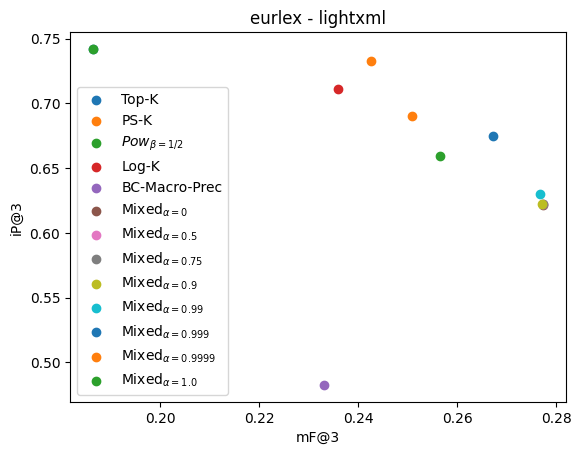

In [18]:
methods = {
    "optimal-instance-prec": "Top-K",
    "optimal-instance-ps-prec": "PS-K",
    "power-law-with-beta=0.5": "$Pow_{\\beta=1/2}$",
    "log": "Log-K",
    "block-coord-macro-prec": "BC-Macro-Prec",
    "block-coord-mixed-prec-f1-alpha=0": "Mixed$_{\\alpha=0}$",
    "block-coord-mixed-prec-f1-alpha=0.5": "Mixed$_{\\alpha=0.5}$",
    "block-coord-mixed-prec-f1-alpha=0.75": "Mixed$_{\\alpha=0.75}$",
    "block-coord-mixed-prec-f1-alpha=0.9": "Mixed$_{\\alpha=0.9}$",
    "block-coord-mixed-prec-f1-alpha=0.99": "Mixed$_{\\alpha=0.99}$",
    "block-coord-mixed-prec-f1-alpha=0.999": "Mixed$_{\\alpha=0.999}$",
    "block-coord-mixed-prec-f1-alpha=0.9999": "Mixed$_{\\alpha=0.9999}$",
    "block-coord-mixed-prec-f1-alpha=1.0": "Mixed$_{\\alpha=1.0}$",
}
x_axis = f"mF@{k}"
y_axis = f"iP@{k}"
plot_results(dataset, model, methods, x_axis, y_axis, k, seed)